In [2]:
import pandas as pd

# Read the data with pandas
data = pd.read_csv("/content/breast_cancer_survival.csv")

# Displaying first few rows of the dataset to understand its structure
print(data.head())

# Identifying features and target variable
features = data.drop('Patient_Status', axis=1)
target = data['Patient_Status']

# Displaying features and target variable
print("Features:\n", features.head())
print("\nTarget variable:\n", target.head())


   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       20-May-18          26-Au

In [9]:
import pandas as pd
df = pd.read_csv('/content/breast_cancer_survival.csv')
print("Column names:")
print(df.columns)
target_variable = 'Age'
print("Target variable:", target_variable)

Column names:
Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')
Target variable: Age


K = 2 Accuracy: 0.7384615384615385
K = 3 Accuracy: 0.7076923076923077
K = 4 Accuracy: 0.7692307692307693
K = 5 Accuracy: 0.7538461538461538
K = 6 Accuracy: 0.7692307692307693
K = 7 Accuracy: 0.7384615384615385
K = 8 Accuracy: 0.7692307692307693
K = 9 Accuracy: 0.7692307692307693
K = 10 Accuracy: 0.7692307692307693
K = 11 Accuracy: 0.7692307692307693
K = 12 Accuracy: 0.7692307692307693
K = 13 Accuracy: 0.7692307692307693
K = 14 Accuracy: 0.7692307692307693
K = 15 Accuracy: 0.7692307692307693
K = 16 Accuracy: 0.7692307692307693
K = 17 Accuracy: 0.7692307692307693
K = 18 Accuracy: 0.7692307692307693
K = 19 Accuracy: 0.7692307692307693
K = 20 Accuracy: 0.7692307692307693


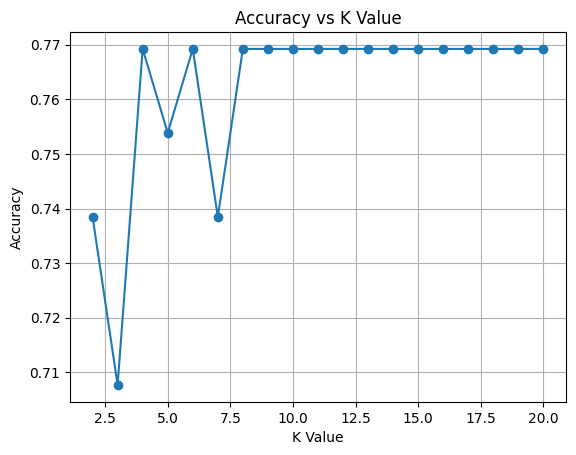

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the data
data = pd.read_csv("/content/breast_cancer_survival.csv")

# Drop date columns
data = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Identify features and target variable
X = data.drop('Patient_Status', axis=1)
y = data['Patient_Status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define column transformer for encoding categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Gender', 'Tumour_Stage', 'Histology',
                                                                  'ER status', 'PR status', 'HER2 status',
                                                                  'Surgery_type'])],
                       remainder='passthrough')

# Apply column transformer
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Find accuracy for different K values [2-20]
accuracy_scores = []
for k in range(2, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print("K =", k, "Accuracy:", accuracy)

# Plot the graph
plt.plot(range(2, 21), accuracy_scores, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv("/content/breast_cancer_survival.csv")  # Replace "your_dataset.csv" with the actual path to your dataset file

# Drop rows with NaN values
data = data.dropna()

# Extract features and target variable
X = data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage']]
y = data['Patient_Status']

# Convert categorical variables to one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Decision Tree Classifier:
Accuracy: 0.65625
Precision: 0.6748724489795919
Recall: 0.65625
F1 Score: 0.6650892857142856
